In [1]:
import pandas as pd 
import numpy as np
import os
import random


In [2]:
DDEC = pd.read_csv("./07result_DDEC_doi.csv")
MOFSIMPLFY = pd.read_csv("./07result_MOFSIMPLIFY.csv")



In [9]:
reference = pd.read_csv("../../DataSet/2023Article_Henry/MOF-CO2-main/Co2WithVolumetricAtomTypes.csv")
reference =  reference[["MOF", "HenryCoeff_CO2"]].drop_duplicates().reset_index(drop=True)
reference_mofs = list(reference["MOF"].values)
## 함수를만들어줘 파일을 대면 그 파일내에서 [CO2] Average Henry coefficient:  라는 문자열이 있는 줄에서 
## [CO2] Average Henry coefficient:  0.00647409 +/- 0.00926172 [mol/kg/Pa] 숫자부분만 추출
def extract_henry_coefficient(filename):
    with open(filename, 'r') as file:
        for line in file:
            if "[CO2] Average Henry coefficient:" in line:
                parts = line.split()
                try:
                    value = float(parts[4])  # Assuming the value is always at index 4
                    return value
                except (IndexError, ValueError):
                    print(f"Error extracting value from line: {line}")
                    return None
                
## ./00_Validation/폴더의 **/**/*.data 파일을 모두 찾아서 extract_henry_coefficient 함수를 적용해서 henry coefficient 값을 추출
#그리고 그값을 ./00_Validation폴더의 **엔트리가 사실 그 폴더이름이 그 MOF이름이 있거덩?
## 그니까 그걸 같이해서 csv
results = []
for root, dirs, files in os.walk("./00_Validation/"):
    for file in files:
        if file.endswith(".data"):
            filepath = os.path.join(root, file)
            henry_value = extract_henry_coefficient(filepath)
            mof_name = '_'.join(filepath.split("/")[2].split("\\")[0].split("_")[0:2])
            # print(filepath.split("/")[2].split("\\")[0])
            
            if henry_value is not None:
                results.append((mof_name, henry_value))
#결과를 데이터프레임으로 변환
MOF_SIMPLYFY_df_results = pd.DataFrame(results, columns=["MOF", "Henry_Coefficient"])
MOF_SIMPLYFY_df_results
reference
MOF_SIMPLYFY_df_results_MOFs = list(MOF_SIMPLYFY_df_results["MOF"].values)
reference_mofs
MOF_SIMPLE_reference_mofs_intersection_list = []
for i in  reference_mofs:
    for r in MOF_SIMPLYFY_df_results_MOFs:
        if i+"_" in r:
            # print(i,r)
            MOF_SIMPLE_reference_mofs_intersection_list.append(i)
MOF_SIMPLE_reference_mofs_intersection_list
MOF_SIMPLE_reference_filtered = reference[reference["MOF"].isin(MOF_SIMPLE_reference_mofs_intersection_list)].reset_index(drop=True)
MOF_SIMPLE_reference_filtered
MOF_SIMPLYFY_df_results["reference"] = MOF_SIMPLE_reference_filtered["HenryCoeff_CO2"]

results = []
for root, dirs, files in os.walk("./01_Validation_DDEC"):
    for file in files:
        if file.endswith(".data"):
            filepath = os.path.join(root, file)
            henry_value = extract_henry_coefficient(filepath)
            mof_name = '_'.join(filepath.split("\\")[1].split("_")[:3])
            # print(filepath.split("/")[2].split("\\")[0])
            if henry_value is not None:
                results.append((mof_name, henry_value))
#결과를 데이터프레임으로 변환
MOF_DDEC_df_results = pd.DataFrame(results, columns=["MOF", "Henry_Coefficient"])
MOF_DDEC_df_results
MOF_DDEC_df_results_mofs = list(MOF_DDEC_df_results["MOF"].values)

MOF_DDEC_reference_mofs_intersection_list = []
for i in  reference_mofs:
    for r in MOF_DDEC_df_results_mofs:
        if i+"_" in r:
            # print(i,r)
            MOF_DDEC_reference_mofs_intersection_list.append(i)
MOF_DDEC_reference_mofs_intersection_list

MOF_DDEC_reference_filtered = reference[reference["MOF"].isin(MOF_DDEC_reference_mofs_intersection_list)].reset_index(drop=True)
MOF_DDEC_reference_filtered
MOF_DDEC_df_results["reference"] = MOF_DDEC_reference_filtered["HenryCoeff_CO2"]
## 생성해

,MOF,Henry_Coefficient,reference
0,FATLUJ_clean_DDEC,0.000049,0.000049
1,FINQOK_clean_DDEC,0.000010,0.000010
2,FORKUU_clean_DDEC,0.000121,0.000120
3,GIKMOD10_clean_DDEC,0.000029,0.000027
4,HOVJIN_clean_DDEC,0.000087,0.000088
5,JOXPIX_clean_DDEC,3319.970000,1674.410000
6,KETHEY02_clean_DDEC,0.001177,0.001204
7,NUYWOU_clean_DDEC,0.001335,0.001330
8,OCUGEZ01_clean_DDEC,0.107290,0.046965
9,OTIPEO_clean_DDEC,0.000535,0.000536


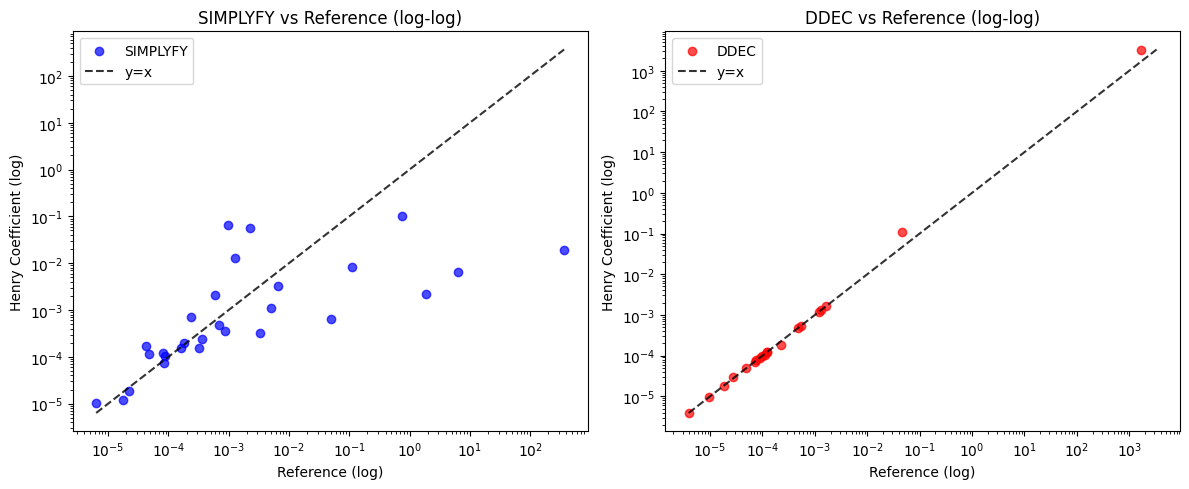

In [14]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12,5))

# 왼쪽: SIMPLYFY
plt.subplot(1,2,1)
x = MOF_SIMPLYFY_df_results["reference"]
y = MOF_SIMPLYFY_df_results["Henry_Coefficient"]

plt.scatter(x, y, alpha=0.7, c="blue", label="SIMPLYFY")
plt.xscale("log")
plt.yscale("log")

# y=x 기준선
lims = [
    np.min([x.min(), y.min()]),
    np.max([x.max(), y.max()])
]
plt.plot(lims, lims, 'k--', alpha=0.8, label="y=x")

plt.xlabel("Reference (log)")
plt.ylabel("Henry Coefficient (log)")
plt.title("SIMPLYFY vs Reference (log-log)")
plt.legend()

# 오른쪽: DDEC
plt.subplot(1,2,2)
x = MOF_DDEC_df_results["reference"]
y = MOF_DDEC_df_results["Henry_Coefficient"]

plt.scatter(x, y, alpha=0.7, c="red", label="DDEC")
plt.xscale("log")
plt.yscale("log")

# y=x 기준선
lims = [
    np.min([x.min(), y.min()]),
    np.max([x.max(), y.max()])
]
plt.plot(lims, lims, 'k--', alpha=0.8, label="y=x")

plt.xlabel("Reference (log)")
plt.ylabel("Henry Coefficient (log)")
plt.title("DDEC vs Reference (log-log)")
plt.legend()

plt.tight_layout()
plt.show()


In [32]:
MOF_SIMPLYFY_df_results

,MOF,Henry_Coefficient
0,ATIRUS_clean,0.006474
1,CENJIQ_clean,0.000484
2,ESUSOC01_clean,0.000121
3,FULQOT_clean,0.000351
4,GAJZOI_clean,0.000655
5,GIQXOU_clean,0.018703
6,IGUTUB_clean,0.000241
7,IKEBUV01_clean,0.000156
8,IPIJUM_clean,0.002234
9,KAYBIX_clean,0.002080


In [8]:
MOF_SIMPLYFY_df_results

,MOF,Henry_Coefficient
0,ATIRUS_clean,0.006474
1,CENJIQ_clean,0.000484
2,ESUSOC01_clean,0.000121
3,FULQOT_clean,0.000351
4,GAJZOI_clean,0.000655
5,GIQXOU_clean,0.018703
6,IGUTUB_clean,0.000241
7,IKEBUV01_clean,0.000156
8,IPIJUM_clean,0.002234
9,KAYBIX_clean,0.002080


array(['ABEXEM', 'ABEXIQ', 'ABEXOW', ..., 'ZUSBOG', 'ZUVTEP', 'ZUXPOZ'],
      dtype=object)